In [3]:
import flopy
import numpy as np
import matplotlib.pyplot as plt

In [16]:
modelname = 'Ex02_E1'
exe_name = '/home/harsh/Desktop/modflow_flopy/flopyCourse/mf2005'
model_ws = 'Results/'

mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws=model_ws)

In [17]:
Lx = 1000.
Ly = 1000.
zbot = [-50., -100.]
nlay = 2 #2 layers for this example
nrow = 10
ncol = 10

ztop = np.ones((nrow, ncol), dtype=np.int32)

for i in range(ncol):
    ztop[:,i] = 10 - i

delr = Lx/ncol
delc = Ly/nrow

dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc, top=ztop, botm=zbot)

[<AxesSubplot:title={'center':'botm layer 1'}>,
 <AxesSubplot:title={'center':'botm layer 2'}>]

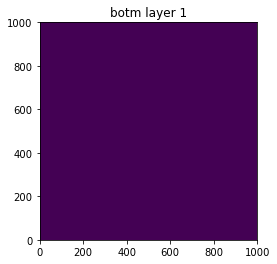

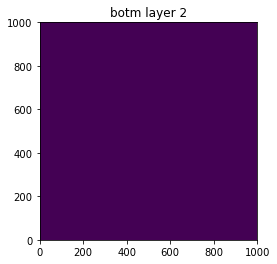

In [18]:
# dis.top.plot() #plot for the top of the model
dis.botm.plot() #plot for the bottom of the model

In [19]:
lpf = flopy.modflow.ModflowLpf(mf, hk=10., vka=10., ipakcb=53, laytyp=[1,0])
#vka defines vertical hydraulic cond.; ipakcb is some fortran legacy thing; laytyp defines type of layer: 0 = confined layer, 1 for unconfined layer
#for mf6, layertype assignment is different, since you define the cell to be confiend or unconfined and not the layer

In [20]:
#for the basic package defintion, you can just reuse the one you defined in
#previous exercise (Ex_01_E2)

ibound = np.ones((nlay, nrow, ncol), dtype = np.int32)
ibound[:,:,0] = -1
ibound[:,:,-1] = -1

strt = np.ones((nlay, nrow, ncol), dtype=np.float32)
strt[:,:,0] = 10
strt[:,:,-1] = 0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [21]:
#Similarly, resuse the spd and observation control

spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, compact=True)

In [22]:
pcg = flopy.modflow.ModflowPcg(mf)

In [23]:
mf.write_input()
mf.run_model()

FloPy is using the following  executable to run the model: /home/harsh/Desktop/modflow_flopy/flopyCourse/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Ex02_E1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2021/06/23  9:31:14

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2021/06/23  9:31:14
 Elapsed run time:  0.006 Seconds

  Normal termination of simulation


(True, [])

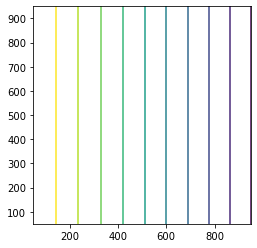

In [28]:
#Plotting the results
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

plt.subplot(1,1,1, aspect='equal')

hds = bf.HeadFile(model_ws + modelname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.arange(0, 10, 1)
extent = (delr/2, Lx - delr/2, Ly - delc/2, delc/2)
plt.contour(head[1,:,:], levels=levels, extent=extent)
plt.savefig(model_ws+'Ex02_E1.png')

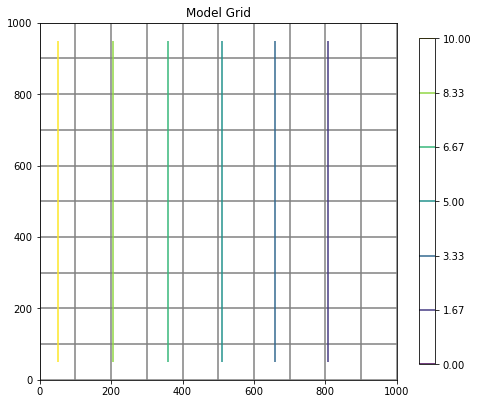

In [33]:
#using flopy for plotting model grid
fig = plt.figure(figsize=(8,8))#figsize in inches
ax = plt.subplot(1,1,1, aspect='equal')
mapview = flopy.plot.PlotMapView(model=mf)#creating the mapview object
linecollection = mapview.plot_grid()
# mapview.plot_ibound() #mapview can be used to plot other things like boundary conditions etc

#you can also plot contours of the head using flopy
contour = mapview.contour_array(head[0,:,:])#head contours for the first layer
plt.colorbar(contour, shrink=0.75) #shrink reduces the size of the colorbar
t = ax.set_title('Model Grid')

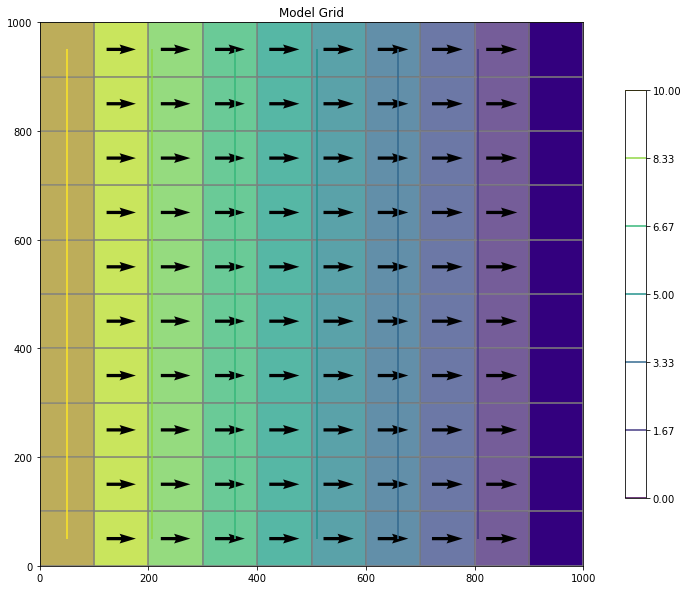

In [41]:
#using flopy for creating quiver plots for showing flow direction
import os

cbb = flopy.utils.CellBudgetFile('Results/Ex02_E1.cbc')
frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
fff = cbb.get_data(text='FLOW FRONT FACE')[0]

fig = plt.figure(figsize=(15,10))#figsize in inches
ax = plt.subplot(1,1,1, aspect='equal')

mapview = flopy.plot.PlotMapView(model=mf)#creating the mapview object
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(head[0,:,:], alpha=0.5)
quiver = mapview.plot_discharge(frf,fff)
linecollection = mapview.plot_grid()
# mapview.plot_ibound() #mapview can be used to plot other things like boundary conditions etc

#you can also plot contours of the head using flopy
contour = mapview.contour_array(head[0,:,:])#head contours for the first layer
plt.colorbar(contour, shrink=0.75) #shrink reduces the size of the colorbar
t = ax.set_title('Model Grid')